In [1]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
# Dataset
# Each point is length, width, type (0, 1)

data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

In [5]:
# Unknown flower
mystery_flower = [4.5, 1]

In [9]:
data[2][1]

1.5

In [10]:
# Network architecture
#       o  flower type
#      / \  w1, w2, b
#     o   o  length, width

In [14]:
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [32]:
# Activation function

def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Derivate of sigmoid
def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

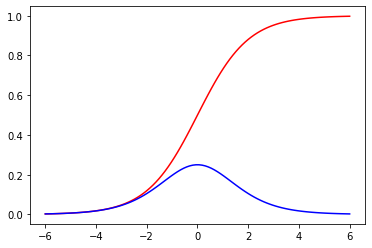

In [35]:
X = np.linspace(-6, 6, 100)
plt.plot(X, sigmoid(X), c='r')
plt.plot(X, sigmoid_p(X), c='b')

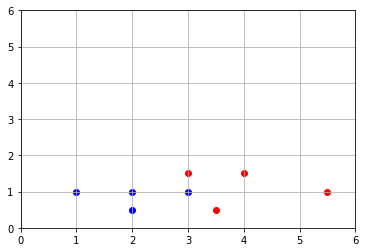

In [43]:
# Scatter data plot
plt.axis([0, 6, 0, 6])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color = 'r'
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0], point[1], c = color)

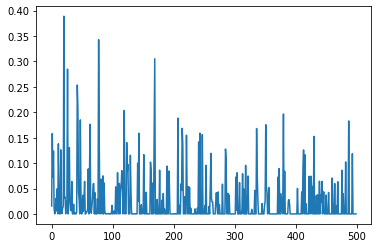

In [69]:
# Training loop

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

iterations = 50000
learning_rate = 0.2

costs = [] # Keep track of cost

for i in range(iterations):
    randomIndex = np.random.randint(len(data))
    point = data[randomIndex]
    
    z = point[0] * w1 + point[1] * w2 + b
    
    pred = sigmoid(z)    
    target = point[2]
    
    # Cost for current random point
    cost = np.square(pred - target)  
    
    # Derivate of cost
    dcost_pred = 2 * (pred - target)
    
    # Derivate of prediction wrt z
    dpred_dz = sigmoid_p(z)
    
    # Derivate of z wrt w1
    dz_dw1 = point[0]
    
    # Derivate of z wrt w2
    dz_dw2 = point[1]
    
    # Derivate of z wrt b
    dz_db = 1
    
    # Derivate of cost wrt each parameters
    dcost_dz = dcost_pred * dpred_dz
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
    # Print the cost over all data points every 1k iters
    if i%100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[randomIndex]
            
            z = point[0] * w1 + point[1] * w2 + b
            pred = sigmoid(z)
            
            target = point[2]
            cost_sum += np.square(pred - target)
        costs.append(cost_sum/len(data))
    
plt.plot(costs)

In [70]:
# Seeing model predictions

for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0] * w1 + point[1] * w2 * b
    pred = sigmoid(z)
    print("Pred: {}".format(pred))

[3, 1.5, 1]
Pred: 6.488091008283923e-41
[2, 1, 0]
Pred: 1.6146483584465934e-27
[4, 1.5, 1]
Pred: 6.288229643553105e-38
[3, 1, 0]
Pred: 1.5649101805961966e-24
[3.5, 0.5, 1]
Pred: 1.1750791450172787e-06
[2, 0.5, 0]
Pred: 3.8944886113518454e-11
[5.5, 1, 1]
Pred: 4.576337725444102e-17
[1, 1, 0]
Pred: 1.66596738506809e-30


In [71]:
z = mystery_flower[0] * w1 + mystery_flower[1] * w2 + b
pred = sigmoid(z)

In [72]:
pred

0.9999303228061031